In [1]:
%matplotlib inline
import io

import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import torch
from IPython.display import Image

In [2]:
plt.rcParams["figure.facecolor"] = (1.0, 1.0, 1.0, 1)
plt.rcParams["figure.figsize"] = [3, 3]
plt.rcParams["figure.dpi"] = 150
plt.rcParams["legend.fontsize"] = "large"
plt.rcParams["axes.titlesize"] = "large"
plt.rcParams["axes.labelsize"] = "large"
plt.rcParams["xtick.labelsize"] = "large"
plt.rcParams["ytick.labelsize"] = "large"

In [3]:
def generate_network(dilation_rates: list):
    layers = []
    for dilation in dilation_rates:
        conv = torch.nn.Conv2d(
            in_channels=1,
            out_channels=1,
            kernel_size=3,
            stride=1,
            padding="same",
            dilation=dilation,
            bias=False,
            padding_mode="zeros",
        )
        conv.weight.data.fill_(1)
        layers.append(conv)
    network = torch.nn.Sequential(*layers)
    return network

In [4]:
def inference_and_return_grad(pixels: int, dilation_rates: list):
    net = generate_network(dilation_rates)

    input_image = torch.zeros((1, 1, pixels, pixels))
    input_image.requires_grad_(True)

    output = net(input_image)

    center_pixel = output[0, 0, pixels // 2, pixels // 2]
    center_pixel.backward()
    return input_image.grad

In [5]:
pixels = 21

In [6]:
def plot_grad(grad, title, show=True):
    grad = grad[0, 0]
    ax = plt.imshow(grad, cmap="Blues", interpolation="none")
    plt.title("Dilation rates: " + title)
    if show:
        plt.show()
    else:
        return ax

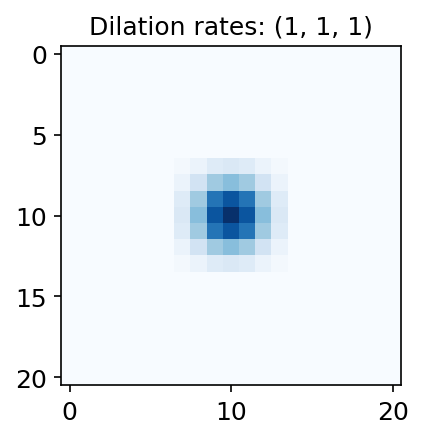

In [7]:
plot_grad(
    inference_and_return_grad(pixels, dilation_rates=(1, 1, 1)), title="(1, 1, 1)"
);

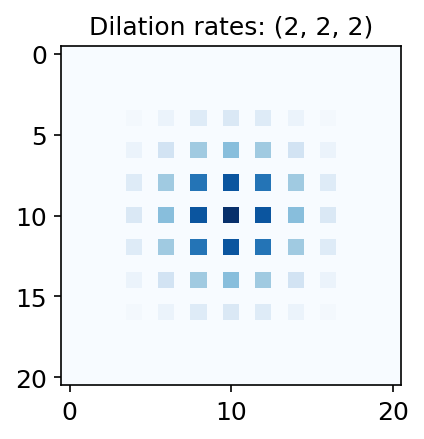

In [8]:
plot_grad(
    inference_and_return_grad(pixels, dilation_rates=(2, 2, 2)), title="(2, 2, 2)"
);

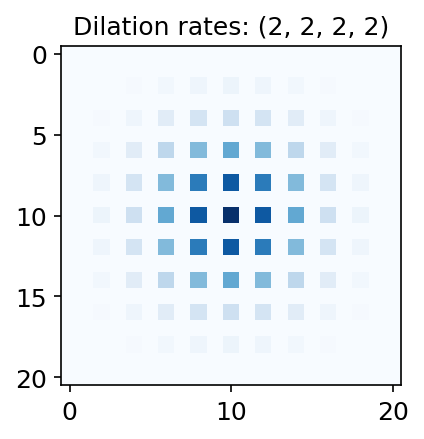

In [9]:
plot_grad(
    inference_and_return_grad(pixels, dilation_rates=(2, 2, 2, 2)), title="(2, 2, 2, 2)"
);

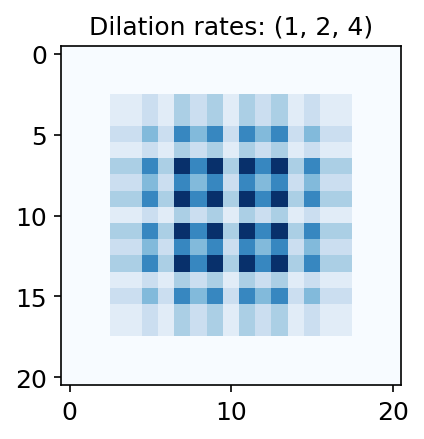

In [10]:
plot_grad(
    inference_and_return_grad(pixels, dilation_rates=(1, 2, 4)), title="(1, 2, 4)"
);

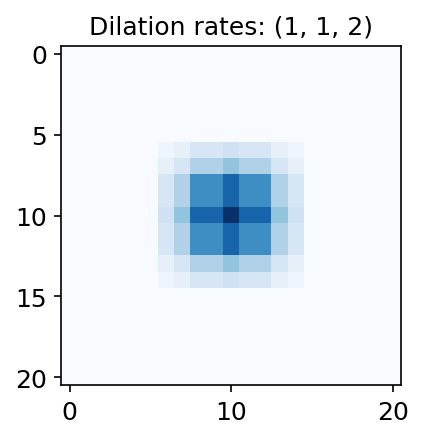

In [11]:
plot_grad(
    inference_and_return_grad(pixels, dilation_rates=(1, 1, 2)), title="(1, 1, 2)"
);

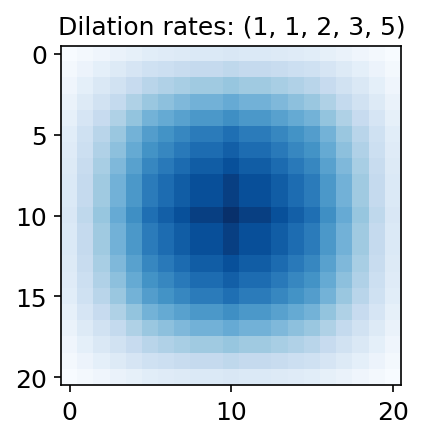

In [12]:
plot_grad(
    inference_and_return_grad(pixels, dilation_rates=(1, 1, 2, 3, 5)),
    title="(1, 1, 2, 3, 5)",
);

In [13]:
def fibonacci_sequence(seq_len: int):
    fib_seq = [1, 1]
    for _ in range(seq_len - 2):
        fib_seq.append(fib_seq[-1] + fib_seq[-2])
    return fib_seq

In [14]:
%%capture
writer = imageio.get_writer("anim.gif", mode="I", duration=1)

nb_layers_end = 5
fib_seq = fibonacci_sequence(nb_layers_end)

for nb_layers in range(1, nb_layers_end + 1):
    ax = plot_grad(
        inference_and_return_grad(pixels, dilation_rates=fib_seq[:nb_layers]),
        show=False,
        title=str(fib_seq[:nb_layers]),
    )
    buf = io.BytesIO()
    ax.figure.savefig(buf, dpi=150)
    buf.seek(0)
    pil_img = PIL.Image.open(buf)
    writer.append_data(np.array(pil_img))

![](anim.gif)